In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('adult.csv')

In [2]:
# Preview dataset
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# dataset shape
df.shape

(48842, 15)

In [4]:
# Data set features and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Dataset statistical summary
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# cehcking for null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

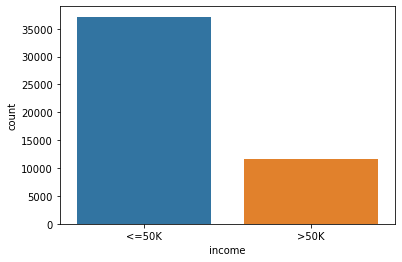

In [7]:
sns.countplot(df['income'])

<AxesSubplot:xlabel='age', ylabel='Density'>

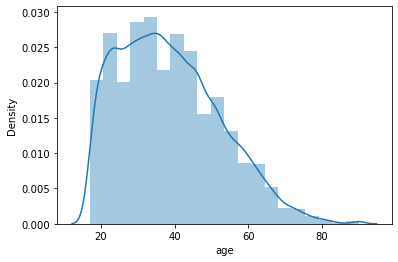

In [8]:
sns.distplot(df['age'], bins=20)

In [9]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
# Remove invalid data from table
columns_with_nan = ['workclass', 'occupation', 'native-country']
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [11]:
# Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
round(income*100,2).astype('str') + '%'

<=50K    76.07%
>50K     23.93%
Name: income, dtype: object

In [12]:
# Encoding the columns
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtypes == 'object':         
    encoder = LabelEncoder()         
    df[col] = encoder.fit_transform(df[col])

In [13]:
X = df.drop('income', axis = 1) 
Y = df['income']

In [14]:
X.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39


In [15]:
Y.head(2)

0    0
1    0
Name: income, dtype: int32

In [16]:
# Solving problem of overfitting by performing Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state = 42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.25
1 4.2
2 17.4
3 3.65
4 8.3
5 7.17
6 7.36
7 9.71
8 1.41
9 2.72
10 8.93
11 2.81
12 9.37
13 1.73


In [17]:
X = X.drop(['workclass', 'education', 'race', 'gender', 'capital-loss', 'native-country'], axis = 1)

In [18]:
# Using feature scaling to standardize the dataset
from sklearn.preprocessing import StandardScaler
for col in X.columns:     
  scaler = StandardScaler()     
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [19]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

In [20]:
# Performing oversmapling as ‘Income’ is highly imbalanced as 76.07% values have income less than 50k and 23.93% values have income more than 50k
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state = 42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [21]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + '%'

0    50.0%
1    50.0%
Name: income, dtype: object

In [22]:
# Split the data into training and testing data in the ratio 80:20 using train_test_spilt()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)

In [23]:
# Applying random forest classifier
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state = 42)
ran_for.fit(X_train, Y_train)
Y_pred_ran_for = ran_for.predict(X_test)

In [24]:
# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest Classifier:')
print('Accuracy score:',round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:',round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.96
F1 score: 93.28
